In [1]:
import os
# print("Current directory:", os.getcwd())

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from plot_utils import set_plot_style, set_spines_black
from sympy import symbols, Eq, solve, Matrix, N, simplify, nsimplify

In [3]:
# -------------------------------------------
# Define symbolic variable and parameters
# -------------------------------------------
x = sp.Symbol('x', real=True, nonnegative=True)
alpha1,beta1,alpha3,K3,n3 = 0.8,3,3,0.5,8 # Parameters
# Define the  ODE
dx_dt = alpha1 - beta1*x + alpha3 *(1-x)*x**n3/(K3**n3 + x**n3)
# Display the ODEs
print("The one dimensional ODE is:")
print("dx_dt =", dx_dt)

The one dimensional ODE is:
dx_dt = x**8*(3 - 3*x)/(x**8 + 0.00390625) - 3*x + 0.8


In [4]:
# Now, to find steady states
steady_states = sp.solve(Eq(dx_dt, 0), x) # Set derivative equal to 0.
# Print each steady state
print("Steady state(s) for the given ODE:")
for i, state in enumerate(steady_states, start=1):
    print(f"Steady state {i}: {N(state, 3)}")

Steady state(s) for the given ODE:
Steady state 1: 0.272
Steady state 2: 0.474
Steady state 3: 0.591


In [5]:
# Define the Jacobian
J = sp.diff(dx_dt, x)
print("\n The Jacobian corresponding to this ODE is:")
display(J)


 The Jacobian corresponding to this ODE is:


-8*x**15*(3 - 3*x)/(x**8 + 0.00390625)**2 - 3*x**8/(x**8 + 0.00390625) + 8*x**7*(3 - 3*x)/(x**8 + 0.00390625) - 3

In [6]:
# Evaluate the Jacobian at each 'STEADY STATE'
stability = []
for r in steady_states:
    slope = float(J.subs(x, r).evalf())
    stability.append('Stable' if slope < 0 else 'Unstable')

In [7]:
# Sample the derivatives between 0 and 1.
x_vals = np.linspace(0, 1, 1000)
rate_vals = np.array([float(dx_dt.subs(x, xv)) for xv in x_vals])

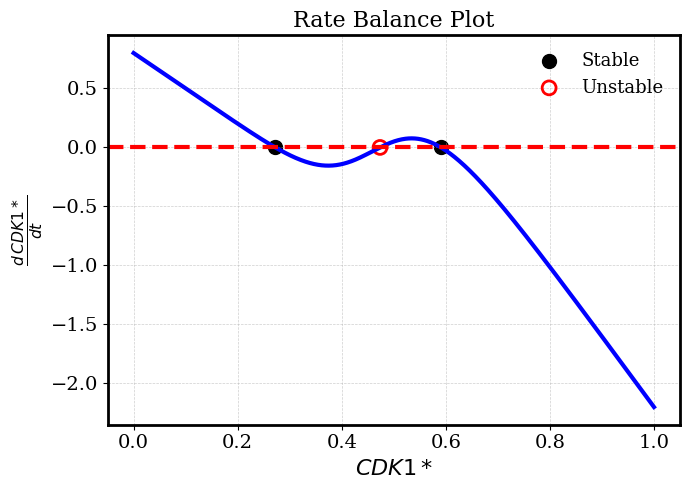

In [8]:
# Rate Balance Plot
set_plot_style(dpi=100)
plt.figure(figsize=(7, 5))
plt.plot(x_vals, rate_vals, color='b', linewidth=3)
# Add horizontal zero line 
plt.axhline(0, linestyle='--',color='r',linewidth=3)

# Mark each steady state
stable = [r for r, st in zip(steady_states, stability) if st == 'Stable']
unstable = [r for r, st in zip(steady_states, stability) if st == 'Unstable']

plt.scatter(
    stable, [0]*len(stable),
    marker='o', s=100, facecolors='k',
    label='Stable'
)

plt.scatter(
    unstable, [0]*len(unstable),
    marker='o', s=100, facecolors='none', edgecolors='r', linewidths=2,
    label='Unstable'
)
# Grid, labels, and styling
plt.grid(True, which='both', ls='--', lw=0.5)
plt.title('Rate Balance Plot')
plt.xlabel(r'$CDK1*$')
plt.ylabel(r'$\frac{d\,CDK1*}{dt}$')

# Make spines black
ax = plt.gca()
set_spines_black(ax)

# Add legend
plt.legend(fontsize=13, loc='best', frameon=False)
plt.savefig("Plots_1/CDK1_RateBalance.pdf", bbox_inches="tight")
plt.show()


In [9]:
######################################################################################################################################################